<a href="https://colab.research.google.com/github/Programapython/detector_osteoartritis/blob/main/practicas/unidad2/practica4/Practica_6_Introducci%C3%B3n_a_OpenCV_SALAZAR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica 6: OpenCV y Operaciones de punto
```

# <font color=#FF0000>OpenCV</color>

* Mas de 2500 algoritmos optimizados

* C/C++, Python, Java y MATLAB, soporta Windows, Linux, Android y Mac OS

* Cuda y OpenCL (Actualmente en desarrollo)

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### **Leer y mostrar una imagen con OpenCV**

Lectura -> cv2.imread(ruta de imagen, opc*)
 * Corregir colores usando indexación
 * Corregir colores cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
 * opc -> cv2.IMREAD_GRAYSCALE

In [3]:
imgSRC = '../Imagenes/robotSofia.jpg'

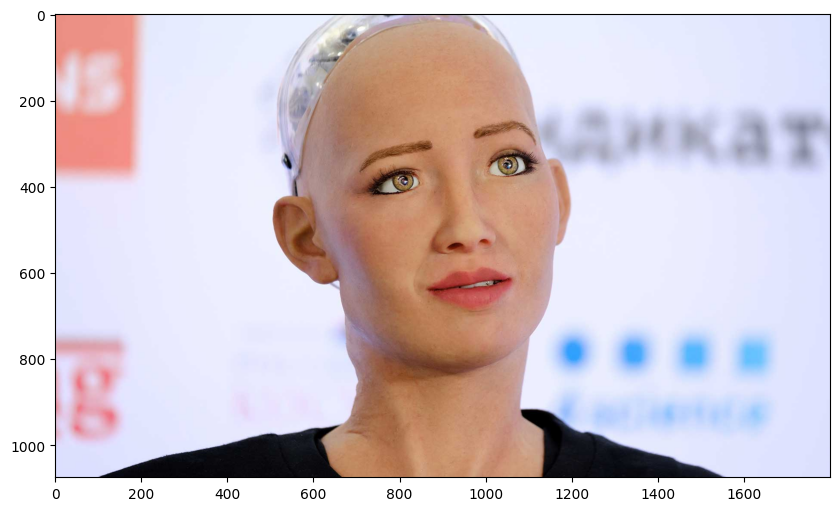

In [5]:
img = cv2.imread(imgSRC) #[..., ::-1]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

**P1. Que sucede si usamos matplotlib para mostrar una imágen leída con openCV?**

Si mostramos con Matplotlib una imagen leída con OpenCV, los colores salen cambiados, como si estuvieran invertidos (el rojo se ve azul y viceversa). Esto se debe a que ambos programas interpretan los colores de forma distinta. Para que la imagen se vea bien, basta con ajustar el orden de los colores antes de mostrarla.

### **Consideraciones al mostrar imagenes con matplotlib**
 * Se realiza un autoescalado

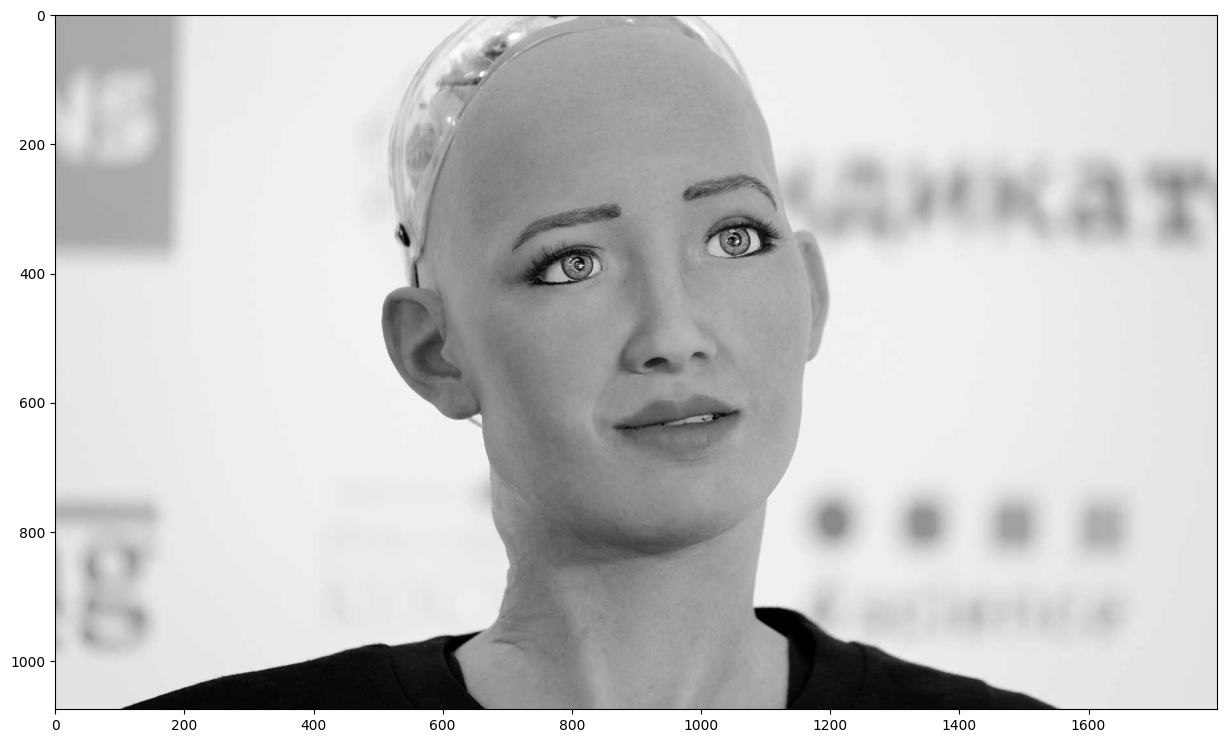

In [6]:
img = cv2.imread(imgSRC,0)
plt.figure(figsize=(15,10))
plt.imshow(img, cmap='gray')
plt.show()

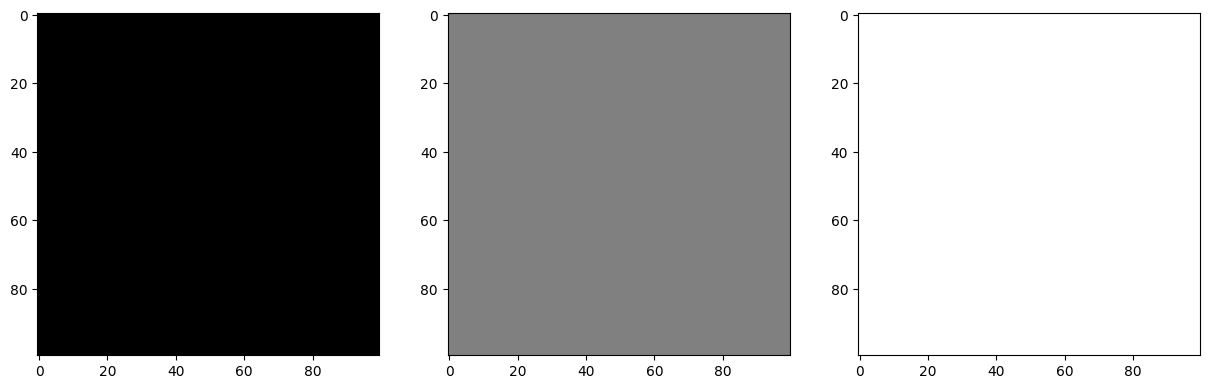

In [7]:
black = np.zeros([100, 100], dtype=np.uint8)
gray = np.ones([100, 100], dtype=np.uint8) * 128
white = np.ones([100, 100], dtype=np.uint8) * 255

plt.subplots(1, 3, figsize=(15,5))
plt.subplot(131)
plt.imshow(black, cmap='gray', vmin=0, vmax=255)
plt.subplot(132)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.subplot(133)
plt.imshow(white, cmap='gray', vmin=0, vmax=255)
plt.show()

P2. Explique la utilidad de vmin y vmax y cuando es importante tenerlo en cuenta

Los parámetros **vmin** y **vmax** de Matplotlib controlan la escala de colores de la imagen. **vmin** define el valor mínimo y **vmax** el máximo. Son importantes para ajustar el contraste y la visibilidad de los detalles en la imagen.

### **Escalando los colores y dibujando dentro de una imagen**


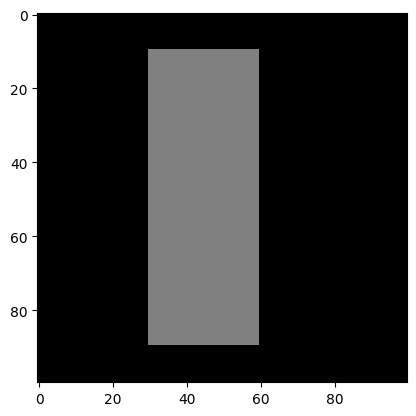

In [8]:
black = np.zeros([100, 100], dtype=np.uint8)
black[10:90, 30:60] = 128

black = black/255

plt.imshow(black, cmap='gray', vmin=0, vmax=1)
plt.show()

**P3. Que tipo de dato es la imagen despues de dividir entre 255?**

Después de dividir la imagen entre 255, los valores de los píxeles se normalizan al rango de 0 a 1. Osea, el tipo de dato de la imagen se convierte a **float64**.


**P4. Explique como funcionan los ejes en las imágenes mostradas en python.**

En Python, al mostrar imágenes, el eje X son las columnas y el eje Y son las filas, con el origen (0, 0) en la esquina superior izquierda. Las coordenadas (x, y) identifican cada píxel, donde x es la posición horizontal y y la vertical.

### **Creando formas dentro de una imagen con numpy y OpenCV**
 * cv2.rectangle(img, pt1, pt2, (color RGB), thickness= )
 * cv2.line(img, pt1, pt2, (color RGB),thickness= )

#### (El cuadrado rojo es realizado con numpy.  El cuadrado verde es realizado con OpenCV)

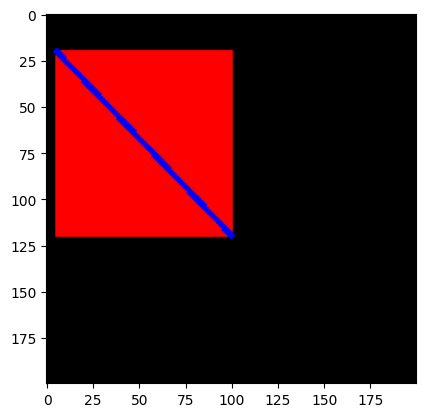

In [9]:
black = np.zeros([200, 200, 3], dtype=np.uint8)
COLOR = (0,0,255)
PT1 = (5, 20)
PT2 = (100,120)
cv2.rectangle(black, PT1, PT2, COLOR, thickness=-1)
cv2.line(black, PT1, PT2, (255, 0, 0), thickness=2)

plt.imshow(black[..., ::-1], cmap='gray')
plt.show()

* cv2.circle(img, (centro), radio, (color), thickness=)

* cv2.putText(img, "Texto", (punto de inicio), fuente, tamaño, (color), thickness=)
 * fuente -> cv2.FONT_HERSHEY_SIMPLEX

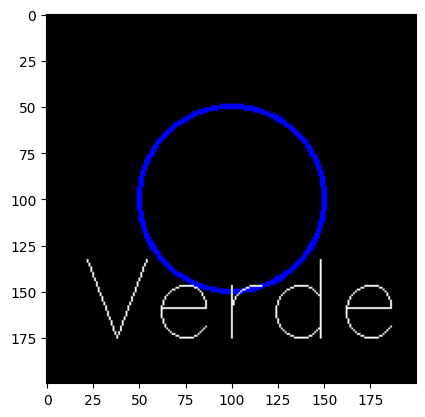

In [10]:
black = np.zeros([200, 200, 3], dtype=np.uint8)
COLOR = (0,0,255)
PT1 = (0, 20)
PT2 = (100,120)

# cv2.rectangle(black, PT1, PT2, COLOR, thickness=-1)
# cv2.line(black, PT1, PT2, (255, 0, 0), thickness=2)
cv2.circle(black, (100,100), 50, (255,0,0), thickness=2)
cv2.putText(black, "Verde", (20,175), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), thickness=1)

plt.imshow(black[..., ::-1], cmap='gray')
plt.show()

### Cambiar tamaño de una imagen con OpenCV-> [resize](https://pythonexamples.org/python-opencv-cv2-resize-image/)

cv2.resize(img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)

*******
* INTER_NEAREST
* INTER_LINEAR
* INTER_AREA
* INTER_CUBIC
* INTER_LANCZOS4

(1075, 1800, 3)


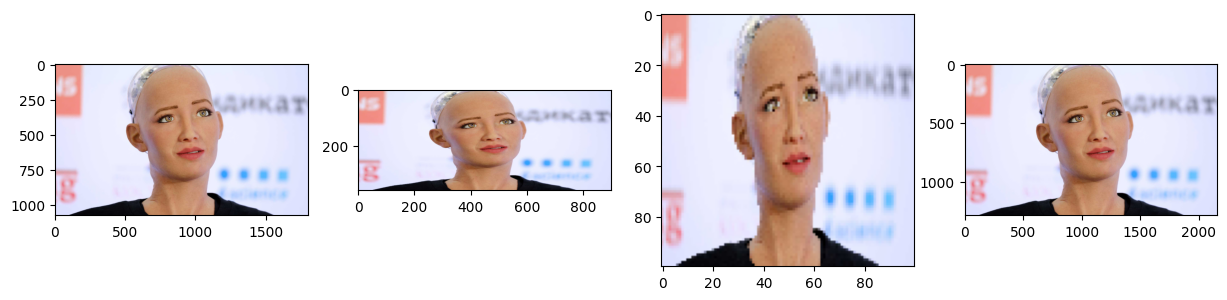

In [11]:
img = cv2.imread(imgSRC)[...,::-1]

img_resize_small1 = cv2.resize(img, None, fx=1/2, fy=1/3, interpolation=cv2.INTER_LINEAR)
img_resize_small = cv2.resize(img, (100,100), interpolation=cv2.INTER_LANCZOS4)
img_resize_big = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)

print(img.shape)
plt.subplots(1, 4, figsize=(15,5))
plt.subplot(141)
plt.imshow(img)
plt.subplot(142)
plt.imshow(img_resize_small1)
plt.subplot(143)
plt.imshow(img_resize_small)
plt.subplot(144)
plt.imshow(img_resize_big)
plt.show()

P5. Cree un bucle para mostrar la imágen original y el efecto de las 5 diferentes interpolaciones al escalar a la mitad su ancho y largo. Se nota la diferencia?

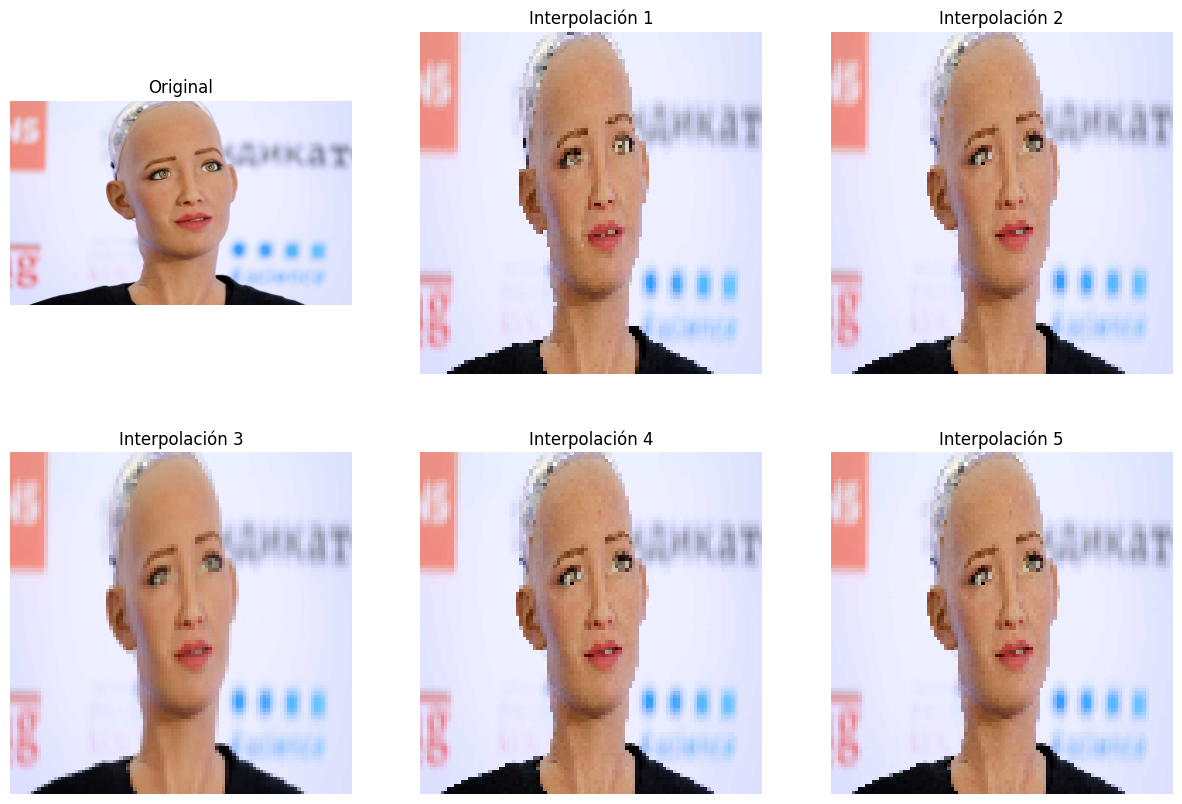

In [12]:
interpolate=[cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_AREA, cv2.INTER_CUBIC, cv2.INTER_LANCZOS4]

plt.figure(figsize=(15, 10))
plt.subplot(2,3,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

for i, interp in enumerate(interpolate, start=2):
    img_resized = cv2.resize(img, (100,100), fx=0.5, fy=0.5, interpolation=interp)
    plt.subplot(2, 3, i)
    plt.imshow(img_resized)
    plt.title(f"Interpolación {i-1}")
    plt.axis('off')
plt.show()



### Mostrar imagen con OpenCV en una ventana
cv2.imshow(nombre de ventana, imagen)
* cv2.waitKey(0)  
* cv2.destroyAllWindows()  

In [ ]:
img = cv2.imread(imgSRC)
cv2.imshow('Robot Sofia', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# <font color=#FF0000>Operaciones de punto</color>


### Negativo de una imagen

* s = 255- f(r)

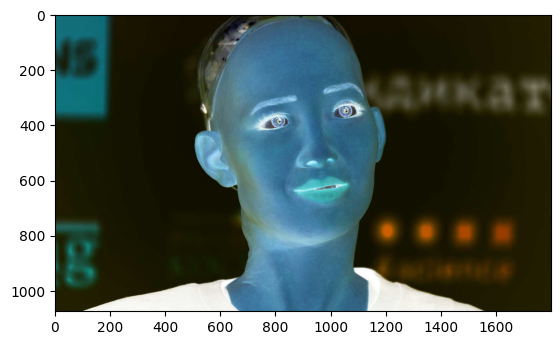

In [13]:
r = cv2.imread(imgSRC)[..., ::-1]/255
s = 1 - r
plt.imshow(s)
plt.show()

### Tranformacion Logarítmica
* s = c.log(1+r)

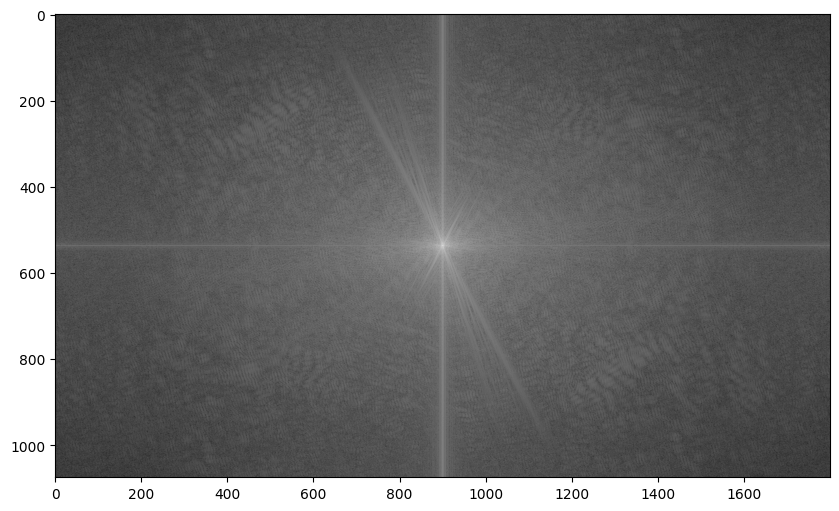

In [14]:
img = cv2.imread(imgSRC, 0)

fft_2 = np.fft.fft2(img)
fft_2_abs = np.abs(fft_2)
fft_2_abs = np.fft.fftshift(fft_2_abs)
fft_2_abs_log = np.log(fft_2_abs+1)

plt.figure(figsize=(10,15))
plt.imshow(fft_2_abs_log, cmap='gray')
plt.show()

P6. Compruebe cuanto son los valores mínimo y máximo de la imagen original y de la imágen que muestra el espectro. Luego describa que efecto tuvo la transformación logarítmica.

In [27]:
print(np.min(img), np.max(img))
print(np.min(fft_2_abs_log), np.max(fft_2_abs_log))

0 255
1.077764213709123 19.75409282523151


La transformación logarítmica reducio el rango dinámico de la imagen espectral, mejorando la visualización y destacando detalles que podrían ser difíciles de apreciar en la imagen original.

### Transformación Gamma
###   $s=cr^\gamma $

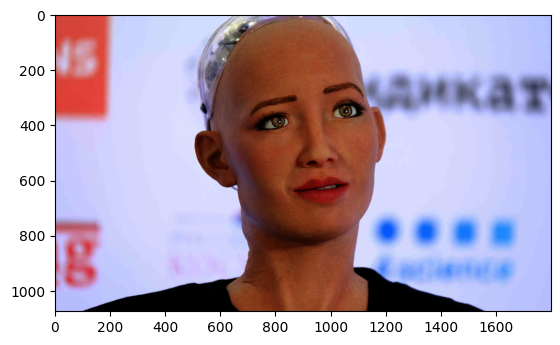

In [15]:
r = cv2.imread(imgSRC)[..., ::-1]/255
s = r**2.3
plt.imshow(s)
plt.show()

### Transformación arbitraria
* ####   Especificar una funcion de transformacion
cv2.LUT(img, lut)

In [16]:
img.shape

(1075, 1800)

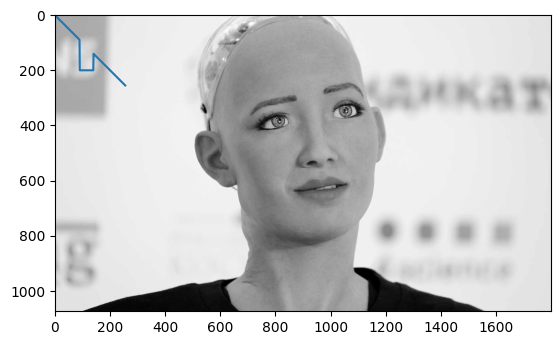

In [17]:
funcion_ejemplo = np.arange(256)
funcion_ejemplo[90: 140] = 200

img = cv2.imread(imgSRC,0)
img_out = np.empty_like(img)
for m in range(img.shape[0]):
    for n in range(img.shape[1]):
        img_out[m,n] = funcion_ejemplo[img[m,n]]

plt.plot(funcion_ejemplo)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)

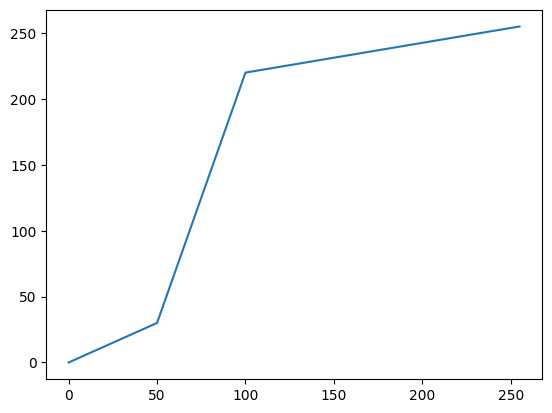

In [18]:
r = np.zeros(256)

for pix in range(256):
    if pix < 50:
        r[pix] = 30/50*(pix-50) + 30
    if 50 <=pix < 100:
        r[pix] = 190/50*(pix-50) + 30
    if 100 <=pix:
        r[pix] = 35/155*(pix-100) + 220

plt.plot(r)
plt.show()

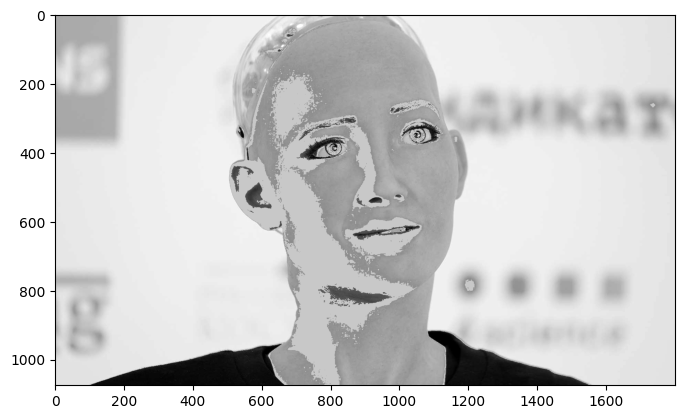

In [19]:
img = cv2.imread(imgSRC,0)
s=cv2.LUT(img, funcion_ejemplo)
plt.figure(figsize=(8,10))
plt.imshow(s, cmap='gray')
plt.show()

### División en capas de bits

* np.bitwise_and(imagen, bit)

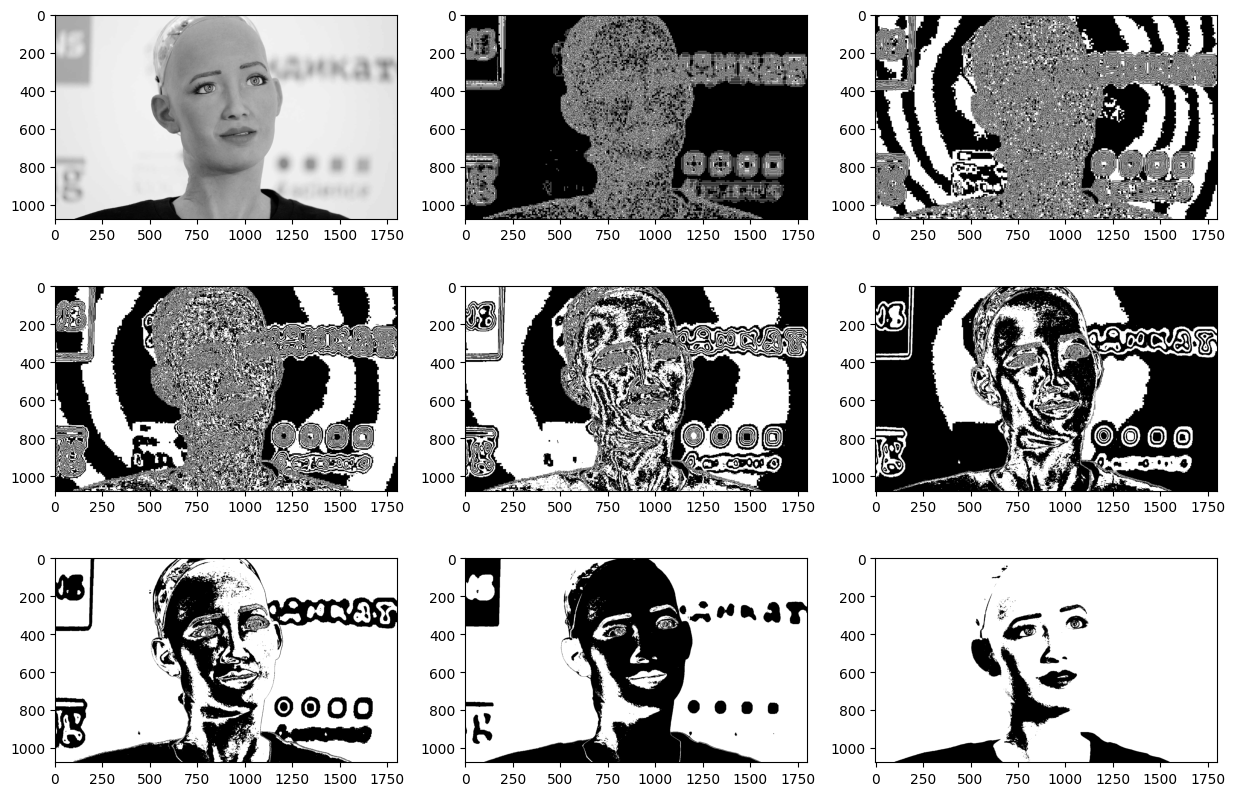

In [20]:
img = cv2.imread(imgSRC, 0)

img7 = cv2.bitwise_and(img, 128)
img6 = cv2.bitwise_and(img, 64)
img5 = cv2.bitwise_and(img, 32)
img4 = cv2.bitwise_and(img, 16)
img3 = cv2.bitwise_and(img, 8)
img2 = cv2.bitwise_and(img, 4)
img1 = cv2.bitwise_and(img, 2)
img0 = cv2.bitwise_and(img, 1)

plt.figure(figsize=(15, 10))
plt.subplot(331)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.subplot(332)
plt.imshow(img0, cmap="gray")
plt.subplot(333)
plt.imshow(img1, cmap="gray")
plt.subplot(334)
plt.imshow(img2, cmap="gray")
plt.subplot(335)
plt.imshow(img3, cmap="gray")
plt.subplot(336)
plt.imshow(img4, cmap="gray")
plt.subplot(337)
plt.imshow(img5, cmap="gray")
plt.subplot(338)
plt.imshow(img6, cmap="gray")
plt.subplot(339)
plt.imshow(img7, cmap="gray")

#### Mostrar solo las 5 capas mas significativas

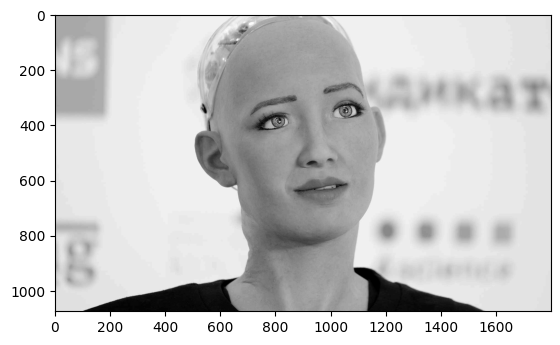

In [21]:
img_comprimida = img7+ img6 + img5 + img4 + img3 + img2
plt.imshow(img_comprimida, cmap="gray", vmin=0, vmax=255)

**P7. Si usted quisiera encriptar un  mensaje dentro de una fotografía, como lo haría?**

Para encriptar un mensaje dentro de una imagen usando Python y OpenCV, primero convertiría el mensaje a binario y luego escondería esos bits dentro de los bits menos significativos de los píxeles de la imagen (usando operaciones puntuales para manipular solo esos bits). Esto permite que el mensaje quede oculto sin alterar visiblemente la imagen, ya que los cambios en esos bits son tan pequeños que el ojo humano no los nota. Finalmente, guardaría la imagen modificada con el mensaje ya oculto.

### Histograma de una imagen
* np.histogram(img, bins, [rango de datos])  (requiere plotear)
* plt.hist(img.ravel(), bins, [rango de datos])
* cv2.calcHist([img], [canal], mascara,[bins], [rango de datos])

#####  Normalizar CDF $ \frac{cdf*hist.max}{cdf.max} $

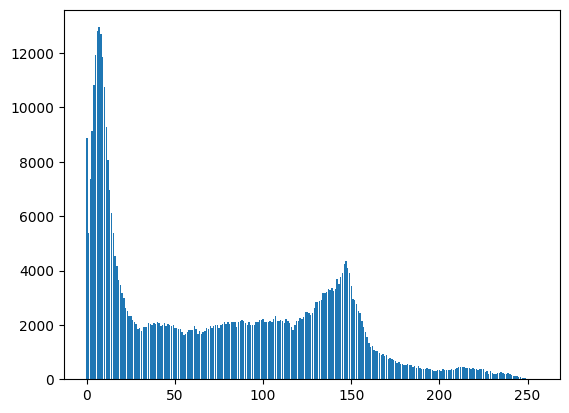

In [22]:
#Numpy
img = cv2.imread("../Imagenes/rayx.jpg")[..., ::-1]
img_gray = img[..., 0]

hist, bins = np.histogram(img_gray, 256, [0, 256])
plt.bar(np.arange(256), hist)
plt.show()

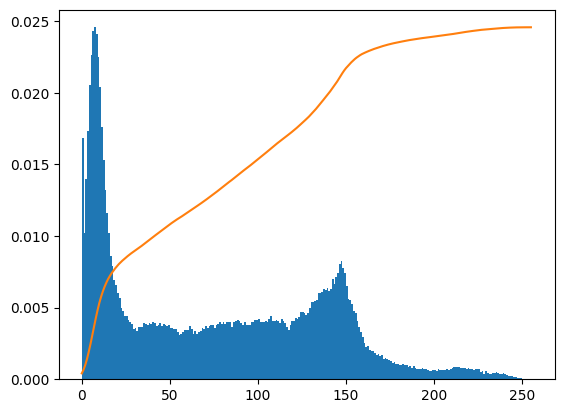

In [23]:
#matplotlib
hist = plt.hist(img_gray.ravel(), 256, [0,256], density=True)
cdf = np.cumsum(hist[0])
cdf_norm = cdf*(hist[0].max())/(cdf.max())
plt.plot(cdf_norm)

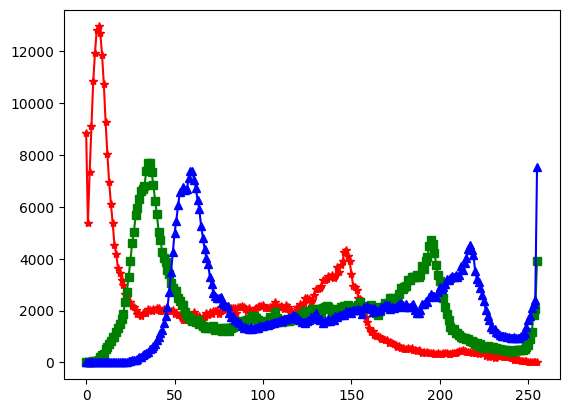

In [24]:
# openCV
color = ("r*-", "gs-", "b^-")
for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], None,[256], [0,256])
    plt.plot(hist, col)

### Equalización de Histograma
* cv2.equalizeHist(img)

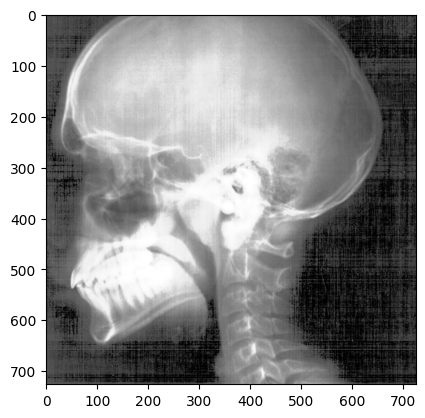

In [25]:
#Numpy
img = cv2.imread("../Imagenes/rayx.jpg")[..., ::-1]
img_gray = img[..., 0]

img_equ = cv2.equalizeHist(img_gray)
plt.imshow(img_equ, cmap="gray", vmin=0, vmax=255)

**P8. Que sucede durante la equalización de histograma?**

Durante la equalización de histograma, la imagen se ajusta para que su rango de niveles de brillo esté mejor distribuido. Osea, la equalización es redistribuir los valores de intensidad (los tonos de gris o colores) para que cada nivel tenga una frecuencia más equilibrada, dándole a la imagen un contraste más uniforme y marcado.

### Equalización de Histograma adaptativa
*clahe = createCLAHE()
*clahe.apply(img)

* [CLAHE Histogram Eqalization](https://www.geeksforgeeks.org/clahe-histogram-eqalization-opencv/)

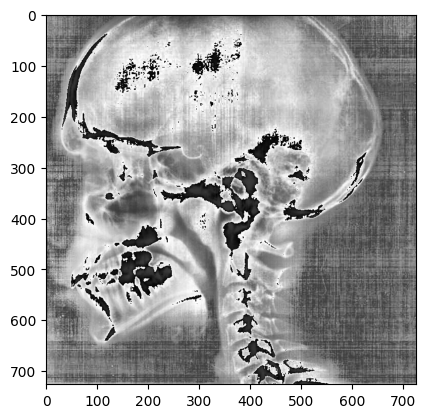

In [26]:
#Numpy
img = cv2.imread("../Imagenes/rayx.jpg")[..., ::-1]
img_gray = img[..., 0]

clahe = cv2.createCLAHE(clipLimit=5)
final_img = clahe.apply(img_gray) + 60

plt.imshow(final_img, cmap="gray", vmin=0, vmax=255)

## Histogram Matching
https://www.pyimagesearch.com/2021/02/08/histogram-matching-with-opencv-scikit-image-and-python/
https://automaticaddison.com/how-to-do-histogram-matching-using-opencv/
